# TITANIC TUTORIAL
Titanic tutorial and dataset provided by Kaggle

- Titanic tutorial on Kaggle [https://www.kaggle.com/competitions/titanic](https://www.kaggle.com/competitions/titanic)
- In this project, I'm gonna follow this post thoroughly. It's written in Korean like this page.
    - [https://kaggle-kr.tistory.com/17?category=868316](https://kaggle-kr.tistory.com/17?category=868316) titanic tutorial1
    - [https://kaggle-kr.tistory.com/18?category=868316](https://kaggle-kr.tistory.com/18?category=868316) titanic tutorial2
-----------------

# 타이타닉 튜토리얼1 by kaggle-kr.tistory.com
글쓴이는 어떤 사람인지 설명이 잘 나와있지는 않았습니다.
글쓴이는 kaggle에서 제시된 titanic tutorial의 유효성을 강조합니다. 실제로 이 titanic tutorial은 처음 캐글에 가입하고 지금까지 아주 자주 보입니다.
이 글에서는 dataset을 분석하여 탑승자의 생존 여부를 예측하는 모델을 만들 것이라고 하였습니다.
데이터 처리, 시각화, 머신러닝에 대하여 사용할 여러 패키지(라이브러리)의 이름이 등장합니다. 그 중에서 머신 러닝을 위해 사용된 sklearn, 시각화에 사용된 seaborn, plotly는 다소 생소하여 간단히 소개를 찾아보았습니다.
- sklearn의 document string에 따르면,  sklearn은 클래식한 머신 러닝 알고리듬을 파이썬의 numpy, scipy, matplotlib같은 '과학 파이썬 패키지'들에 통합하는 모듈입니다. 목표는 문제를 학습하는 간단하고 효과적인 솔루션을 널리 제공하는 것이 목표라고 합니다. 머신 러닝을 과학과 공학의 다재다능한 도구로 활용할 수 있게 하는 것입니다,
- [plot.ly/python](https://plot.ly/python) 에 따르면, plotly는 'graphing library'로 상홎작용하고 출판물 수준의 다양한 plot, chart, heatmap같은 figure를 만든다고 합니다.  
- [seaborn.pydata.org](https://seaborn.pydata.org)에 따르면 seaborn은 matplotlib 기반의 시각화 라이브러리로 매력적이고 informative한 그래프를 그리는 높은 수준의 인터페이스를 제공한다고 합니다.   

또 이 글에서는 캐글의 여러 커널을 참고했다고 하며 문서 끝에는 그 링크 목록도 첨부하고 있습니다. 커널은 본래 알맹이, 씨앗 등의 의미이고 운영체재에서 입출력 장치 등을 제외하고 명령을 처리하는 핵심부를 말하는 것입니다만 캐글에서 말하는 커널은 competition 등에서 문제 해결을 위해 사람들이 제시한 방법들을 일컫는 것 같습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') #matplotlib의 scheme이 아닌 seaborn의 scheme을 사용합니다.
sns.set(font_scale=2.5) #seaborn의 font_scale을 사용하면 그래프의 font size를 하나하나 지정하지 않아도 된다고 합니다.

#ignore warnings
import warnings
#warnings.filterwarnings('ignore') #warning을 출력하지 않습니다.

import missingno as msno #빠진 데이터 찾는데 특화된 모듈입니다.

- [github.com/ResidentMario/missingno](https://github.com/ResidentMario/missingno) 에 따르면 missingno는 데이터의 무결성 혹은 결손을 시각화하는데 특화된 간단하고 유연한 모듈입니다.

## 우리가 앞으로 할 일
글쓴이는 우리가 해야 할 일을 단계별로 설명합니다. 먼저 dataset을 갈무리하고 탐색적 데이터 분석(EDA)을 통해 통찰을 얻습니다. 그리고 feature engineering을 통해 학습시킬 데이터를 준비합니다. 여기까지가 이번 필사의 주요 내용입니다. 이 뒤의 모델 선정, 학습, 결과 평가도 중요하겠지만 여기서 깊이 다루지는 않습니다.

## Dataset의 확인
kaggle에서 테이블화 돼있는 두 개의 dataset을 제공했습니다. 학습을 위한 train dataset과 결과를 평가하기 위한 test dataset입니다. 이것을 pandas를 이용해 분석합니다.


In [2]:
#-----file import code for google colab-----
#try:
#     ftrain=open('train.csv','r')
#     ftest=open('test.csv','r')
#     ftrain.close()
#     ftest.close()
#except:
#    from google.colab import files #구글 colab용으로 파일을 업로드합니다.
#    uploaded=files.upload()

In [3]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv') #csv는 줄넘기기, 구분자로 이루어진 2차원 포맷으로 널리 쓰입니다. 엑셀로도 잘 읽힙니다.

%matplotlib inline 
#주피터 노트북 같은 환경에서 graph를 바로 출력시켜줌

In [4]:
df_train.head() #판다스 데이터프레임은 head, tail메소로 시리즈의 첫부분 혹은 끝 부분 몇 줄을 확인할 수 있습니다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## feature를 살펴봅시다.
- servived 생존여부로 1, 0으로 주어져 있습니다. 이것은 target label이기도 합니다.
- Pclass는 1등석, 2등석, 3등석을 categorical feature로 보여줍니다.
- sex는 둘로 구분하였고 binary입니다. 둘 중 하나로 정해진다는데 넓게는 카테고리컬로 봐도 되지 않나 싶습니다.
- age는 integer인 것을 보니 월/일까지는 고려를 안 한 것 같네요.
- sibSp 는 함께 탑승한 형제자매, 배우자입니다.
- parch 는 부모/자식의 수입니다
- 선원에 대해서는 자료가 없는 것 같습니다.
- ticket 티켓 고유번호는 번호라고 했지만 발행처 등에 따라 형식이 제각각입니다. 영어와 숫자로 돼있습니다.
- fare 운임입니다. 이것만 float이고 나머지는 string or integer
- cabin 객실번호는 알파벳+숫자 스트링입니다. 
- embarked 탑승항구의 이니셜로 C cherbourg Q queenstown S southampton입니다. 

dataframe의 describe() 메소드는 각 feature에 대한 기본적인 통계값추출력합니다.









In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Null data check

데이터 결손을 확인합니다. 아래 코드에서 {:>10}은 10칸을 비워두고 column 이름을 우측정렬하여 출력합니다. format에서는 column의 값들이 null인지 확인하여 더하고, 전체 column의 길이로 나누고 100을 곱해 null값들의 수를 백분율로 환산합니다.

In [7]:
for col in df_train.columns:
    msg='column: {:>10}\t percent of NaN value: {:.2f}%.'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NaN value: 0.00%.
column:   Survived	 percent of NaN value: 0.00%.
column:     Pclass	 percent of NaN value: 0.00%.
column:       Name	 percent of NaN value: 0.00%.
column:        Sex	 percent of NaN value: 0.00%.
column:        Age	 percent of NaN value: 19.87%.
column:      SibSp	 percent of NaN value: 0.00%.
column:      Parch	 percent of NaN value: 0.00%.
column:     Ticket	 percent of NaN value: 0.00%.
column:       Fare	 percent of NaN value: 0.00%.
column:      Cabin	 percent of NaN value: 77.10%.
column:   Embarked	 percent of NaN value: 0.22%.


In [8]:
for col in df_test:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


Train, Test 셋의 결과에서 null data가 많은 feature는 age와 cabin이고 embarked에도 null data가 있는 것을 확인 할 수 있습니다. 또한 그 비율도 두 파일에서 비슷합니다.

<AxesSubplot:>

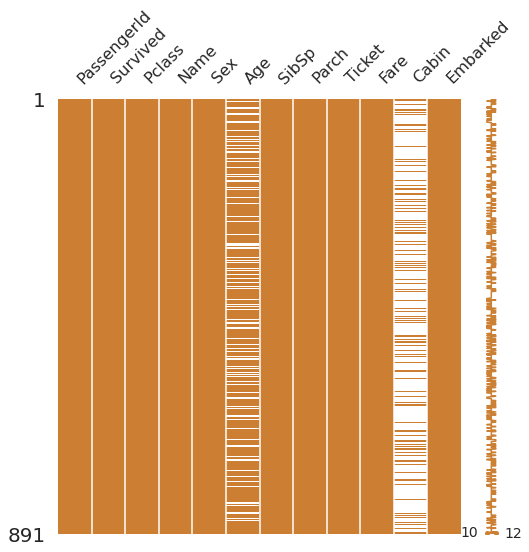

In [9]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))
#missingno에서 가져온 이 함수는 주어진 dataframe의 'nullity'를 matrix로 표현한다고 합니다.
#pandas dataframe의 iloc 메소드는 행/열을 선택해서 가져온다는데 여기서는 별로 하는 일이 없는 것 같습니다. iloc은 integer location으로 index를 말하는 것 같습니다.

<AxesSubplot:>

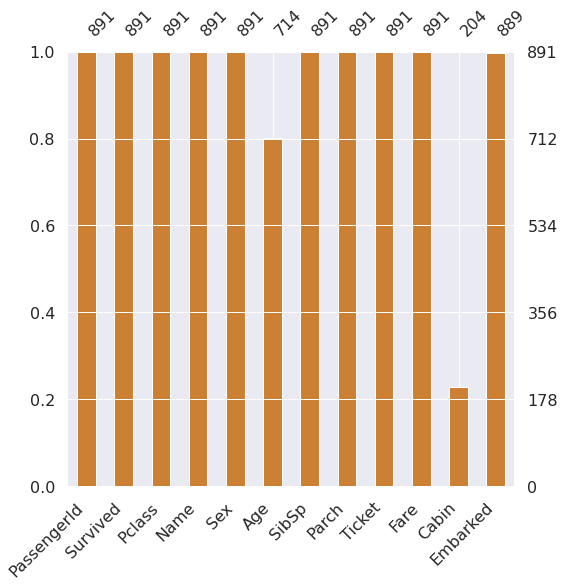

In [10]:
msno.bar(df=df_train, figsize=(8,8), color=(0.8,0.5,0.2))

## 1.2 Target label 확인
Target label의 distribution을 확인해봐야 모델을 제대로 선택할 수 있다고 합니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


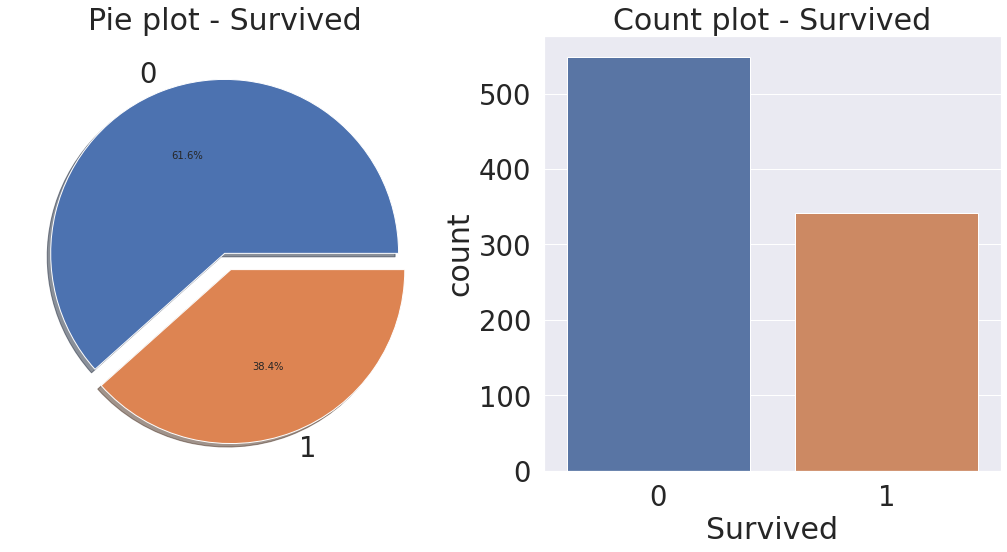

In [11]:
f, ax = plt.subplots(1,2,figsize=(18,8)) #18,8 크기로 수평하게 두 개의 그래프를 그릴 에정입니다 

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
#survied column에서 수를 세면 1과 0이 몇개인지에 대한 데이터가 나옵니다.
#이것을 다시 dataframe의 plot.pie 메서드로 파이 차트를 그립니다.
#이게 왼쪽에 출력되는 것은 ax=ax[0]에서 결정됩니다.
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

#중간에 plt(pyplot)는 거의 호출되지 않았지만, 사실 seaborn이나 pandas에서 plot을 사용하면,
#pyplot이 그릴 그래프의 정보를 만들어 전달합니다. 그래서 plt.show()를 통해 그동안 설정한 그래프가 출력됩니다.


../input/titanic/train.csv## 2. Exploratory data analysis

## 2.1. Pclass
Pclass는 카테고리가 있으면서 순서가 있는(서수형) 데이터 타입이라고 합니다. 생존률과의 상관관계를 파악하기 위해, pclass별 총합, 생존률, 생존자 수 등을 계산합니다.

In [12]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()
#df_train[['Column1','Colum2']] 는 두 개의 column만 포함하는 새로운 데이터프레임을 반환합니다.
#groupby메소드를 사용하면 Pclass에 해당하는 승객의 총 숫자가 나옵니다.

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()
#sum을 하면 Survived가 0인 경우는 값이 0이라 그런지 해당 Pclass에서 생존자 수가 나옵니다.

,Survived
Pclass,
1,136
2,87
3,119


두 개의 column을 가지고 간단히 분석을 해보았는데, crossmap 메서드를 사용하면 이 과정을 좀 더 수월하게 할 수 있다고 합니다. crosstab에 두 개의 시리즈를 넣어주면 각 경우의 수를 볼 수 있습니다.
style 이후의 것은 없어도 표는 출력됩니다.

In [14]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')
#margin은 마지막 All 행/열을 보여줄지 결정합니다.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


grouped 객체에 mean()메서드를 쓰면 클래스별 생존률이 계산됩니다.

<AxesSubplot:xlabel='Pclass'>

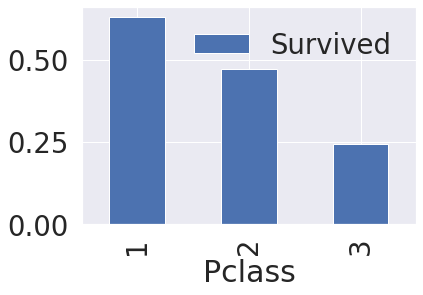

In [15]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()
#원래는 mean()메서드를 적용한 이후 .sort_values(by='Survived',ascending=False)를 적용하는데 없어도 똑같이 나와서 뺐습니다.

Pclass가 좋을수록 생존률이 높아졌습니다. 이번에는 seaborn의 countpolot을 이용해 label의 개수를 그려봅니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


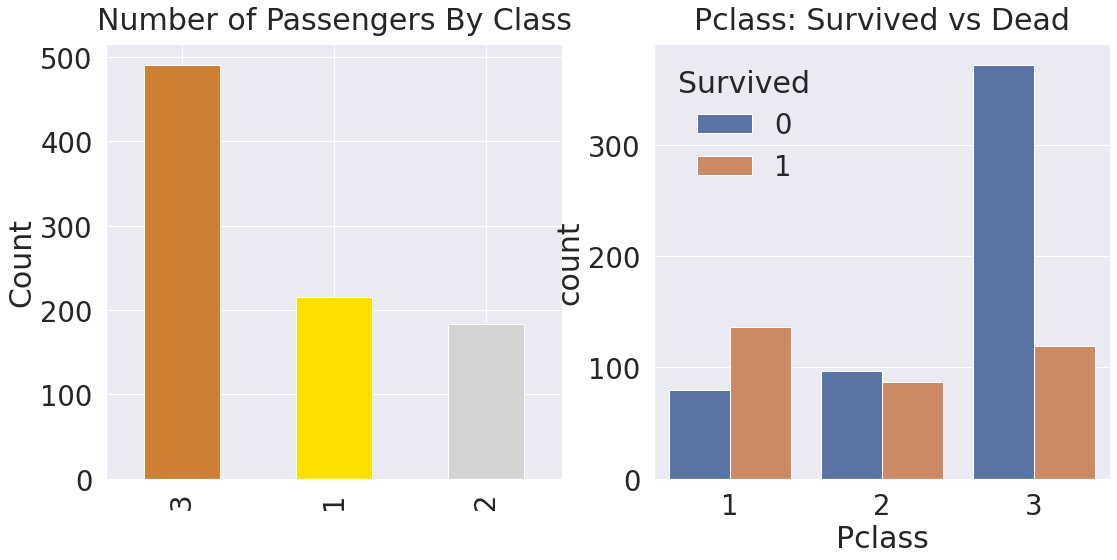

In [16]:
y_position=1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Class', y=y_position)
#title 높이를 그래프 위에 둡니다. (y=1.02)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
#countplot는 Pclass별로 Survived 0,1의 숫자를 대비해서 보여줍니다.
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

Pclass는 생존률과 상관관계가 큰 feature라고 볼 수 있습니다.
## 2.2 Sex

같은 방식으로 성별에 대해 분석합니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


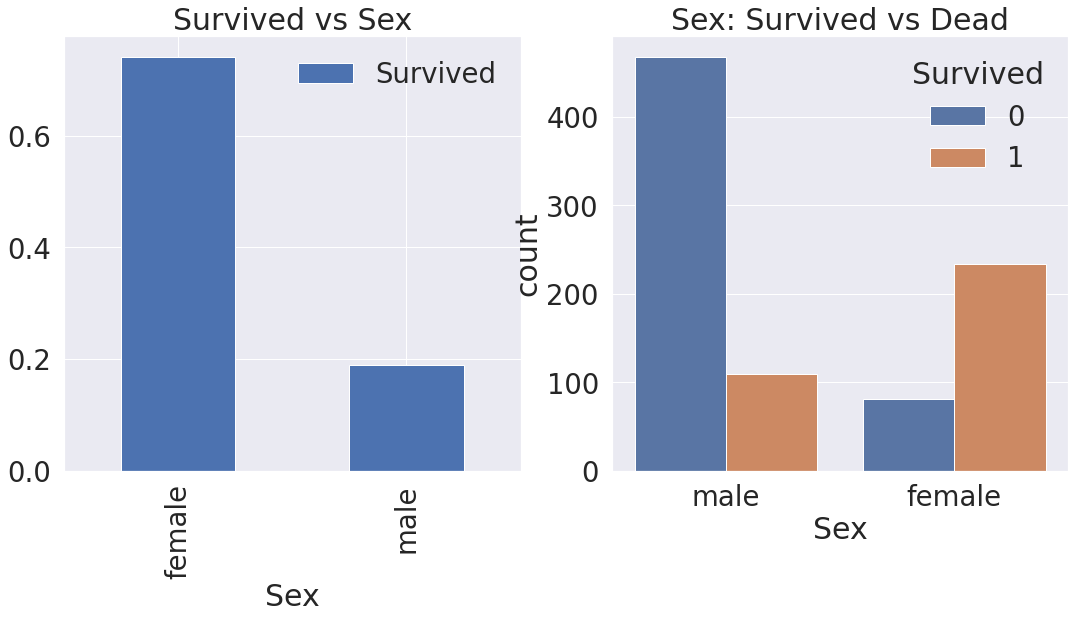

In [17]:
f, ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

../input/titanic/train.csv여기서도 큰 상관관계가 보입니다.

In [18]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()
#역시 .sort_values(by='Survived', ascending=False) 는 차이가 없어서 뺐습니다.

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Pclass처럼 Sex도 생존률과 상관관계가 큰 feature임을 알 수 있습니다.

## Both Sex and Pclass

이번에는 두 개의 feature에 대해서 생존률이 어떻게 달라지는지 확인합니다. seaborn의 factorplot을 이용하면 3개 차원으로 구성된 데이터를 그래프로 그릴 수 있습니다.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


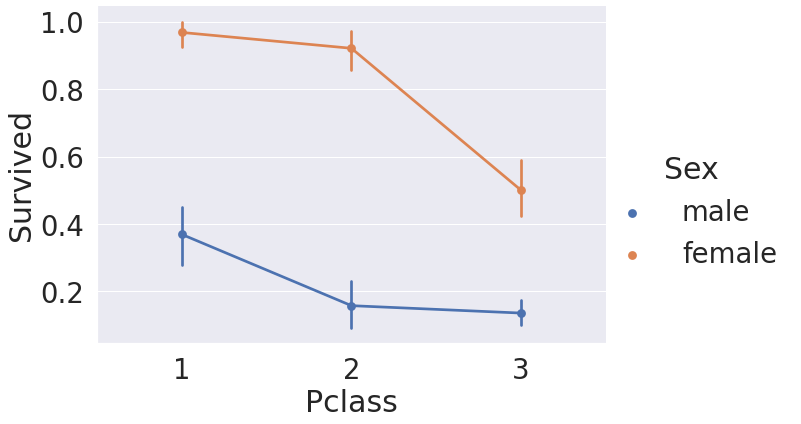

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train,size=6, aspect=1.5)

세 개의 column을 같이 놓고 봐도 Pclass, Sex에 따른 생존율은 같은 경향을 보입니다.  
 datapoint의 수직선은 errorbar인데 해당되는 사람의 수가 결정한 것으로 보입니다. 이것을 확인해 봅시다.

In [21]:
pd.crosstab(df_train['Sex'], df_train['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


errorbar가 특히 작은 3등석 남자의 경우 수가 확실히 많지만, 비슷할 정도로 작은 1등석 여성은 설명되지 않습니다. 아마 대부분 생존했기 때문에 그런 것 같네요. 표준편차의 식  
$σ = Σ_{n=1}^N \frac{\sqrt{\left( a_i-E(a) \right)^2}}{N}$  
여기서 $E(a)$는 평균입니다. 여기에서 생각해보면 어떨까요? 정확히 어떤 식이 적용됐는지 모르겠네요.  
  
Hue 대신 Column을 적용하면 아래와 같이 그래프가 subplot에서와 같이 따로 나옵니다.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


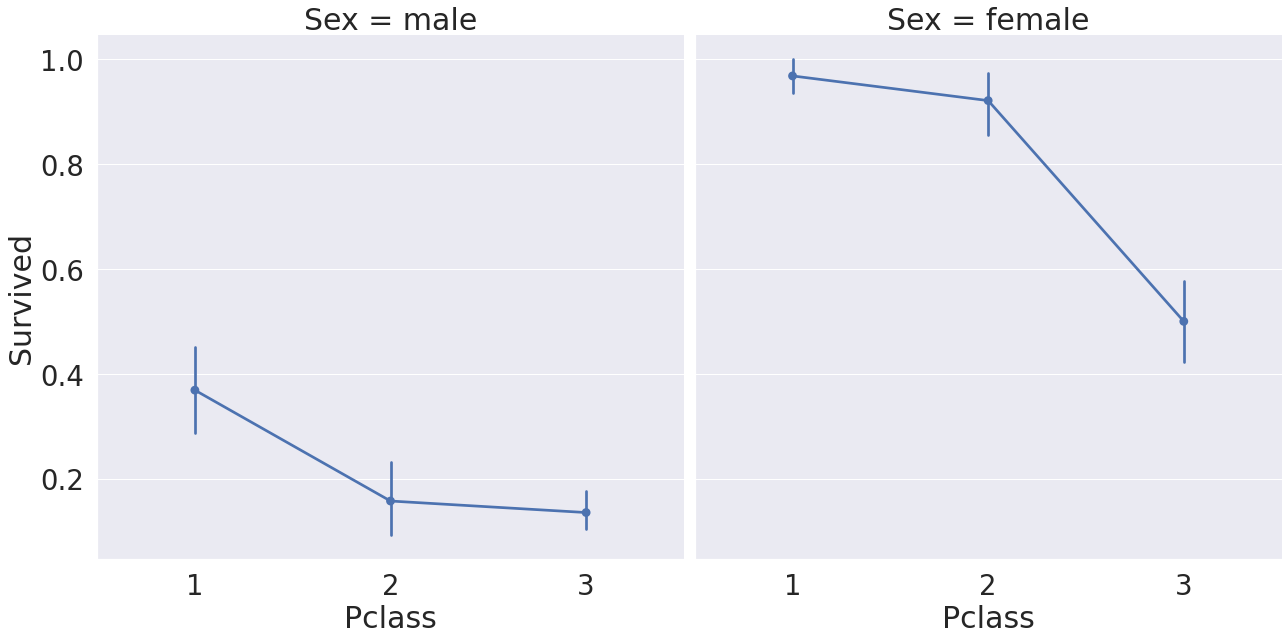

In [22]:
sns.factorplot('Pclass', 'Survived', col='Sex', data=df_train, saturation=.5, size=9, aspect=1)
#새로운 정보가 있는지는 잘 모르겠습니다.

## 2.4. Age

Age feature는 이전의 feature와 달리 categorical하지 않습니다.  
평균, 최대, 최소값을 알아보고 생존률에 따른 age의 히스토그램을 그려봅니다.

In [23]:
print('최고령자 : {:.1f} Years'.format(df_train['Age'].max()))
print('최연소자 : {:.1f} Years'.format(df_train['Age'].mean()))
print('평균 연령 : {:.1f} Years'.format(df_train['Age'].mean()))

최고령자 : 80.0 Years
최연소자 : 29.7 Years
평균 연령 : 29.7 Years


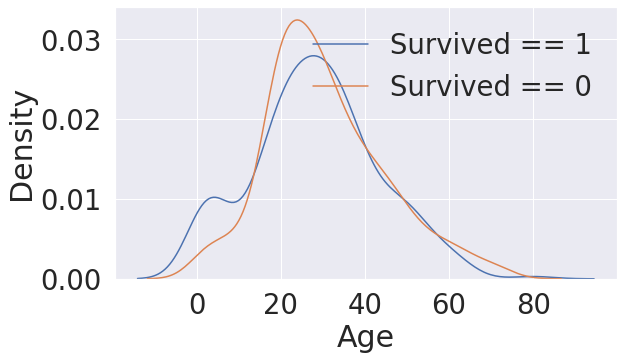

In [24]:
fig, ax = plt.subplots(1,1,figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

10세 이하에서는 생존자가 많고, 10 - 30세에서는 사망자가 많습니다.

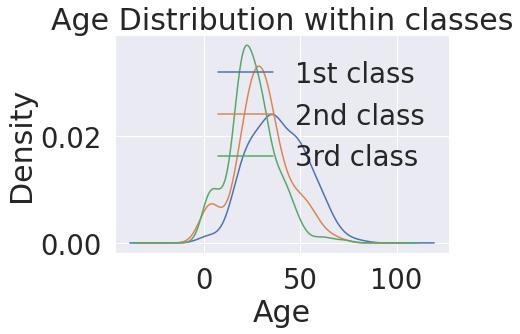

In [25]:
plt.figure()
df_train['Age'][df_train['Pclass']==1].plot(kind='density')
#df_train['Age'][df_train['Pclass']==3] 는 age 시리즈 중에서 뒤의 조건을 만족하는 것만 남겨서 새로운 시리즈를 반환합니다.
#kde는 Kernel Density Estimation plot입니다. density와 같다고 합니다. bar형태로 나오는 히스토그램은 'hist'라고 하면 됩니다.
df_train['Age'][df_train['Pclass']==2].plot(kind='density')
df_train['Age'][df_train['Pclass']==3].plot(kind='density')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

클래스가 높을 수록 연령이 올라갑니다.

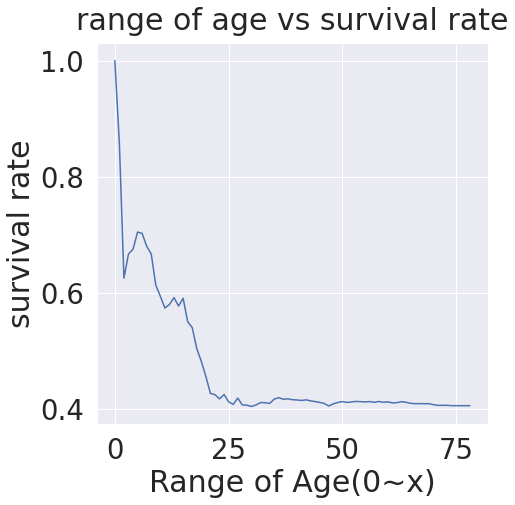

In [26]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() /len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('range of age vs survival rate', y=1.02)
plt.ylabel('survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

여기에서 나이가 어릴 수록 생존률이 확실히 높다는 것을 알 수 있다는데 그 전에 본 것에서 왜 새로운 결론이 나오는지 설명이 되지 않고 있습니다. 연령 범위를 거꾸로 보겠습니다.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


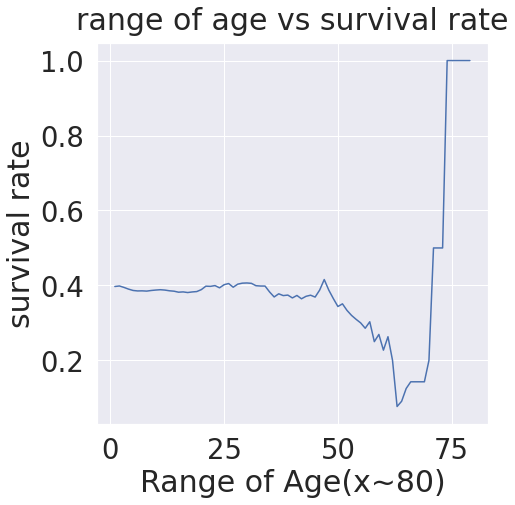

In [27]:
cummulate_survival_ratio = []
for i in range(80,0,-1):
    cummulate_survival_ratio.append(df_train[df_train['Age']>i]['Survived'].sum() /len(df_train[df_train['Age'] > i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(range(80,0,-1),cummulate_survival_ratio)
plt.title('range of age vs survival rate', y=1.02)
plt.ylabel('survival rate')
plt.xlabel('Range of Age(x~80)')
plt.show()

누적 합을 제대로 사용한 것인지 잘 모르겠습니다.

## 2.5 Pclass, Sex, Age
Seaborn의 Violinplot을 통해 여러 feature에 대해서 보고 싶다고 합니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


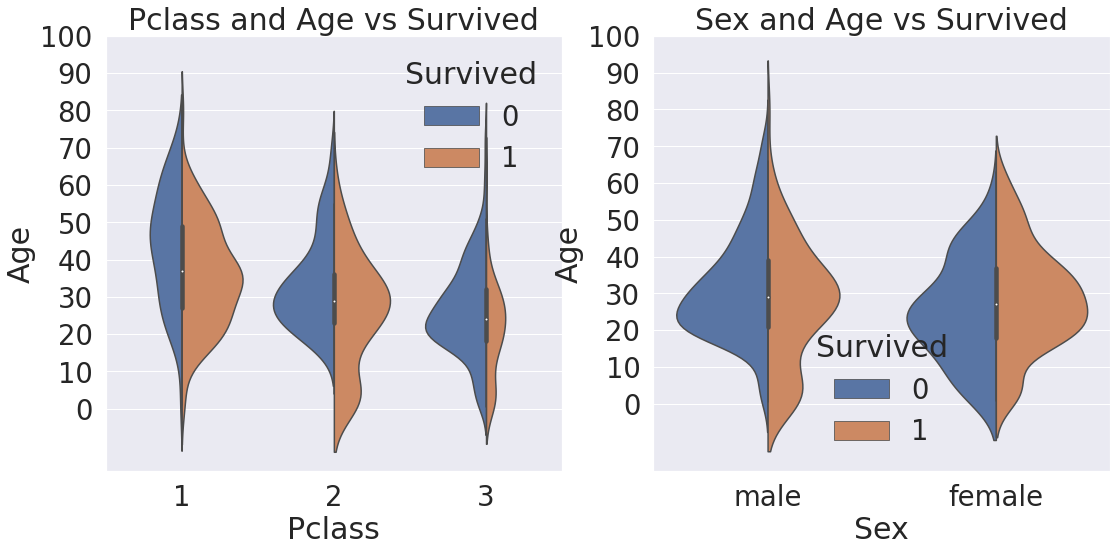

In [28]:
f, ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex", "Age", hue="Survived", data=df_train, sclae='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

연령에 따른 생존/사망 분포를 Pclass, Sex에 대해 나누어 보았습니다. 우측의 graph는 블로그의 것과 상당히 다르게 나왔습니다. normalize에 문제가 있었던 것일까요?  
그리고 이전의 결론들과 딱히 새로운 결론을 도출할 수는 없었습니다.

## 2.6 Embarked
탑승한 항구는 세 곳으로 나뉩니다. 이에 대해서도 비슷한 분석을 진행합니다.

<AxesSubplot:xlabel='Embarked'>

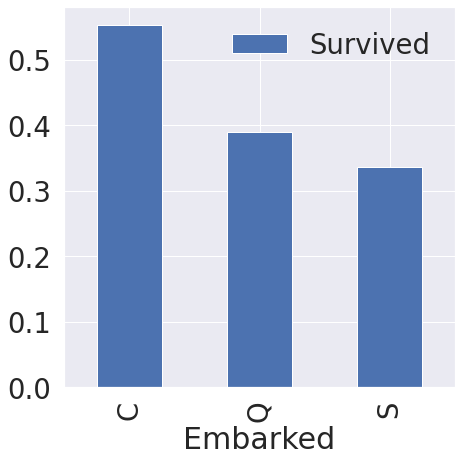

In [29]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar(ax=ax)

성별이나 티켓 등급보다는 덜하지만. 상당한 생존률 차이를 보입니다. 다른 feature로 split하여 한번 살펴봅니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

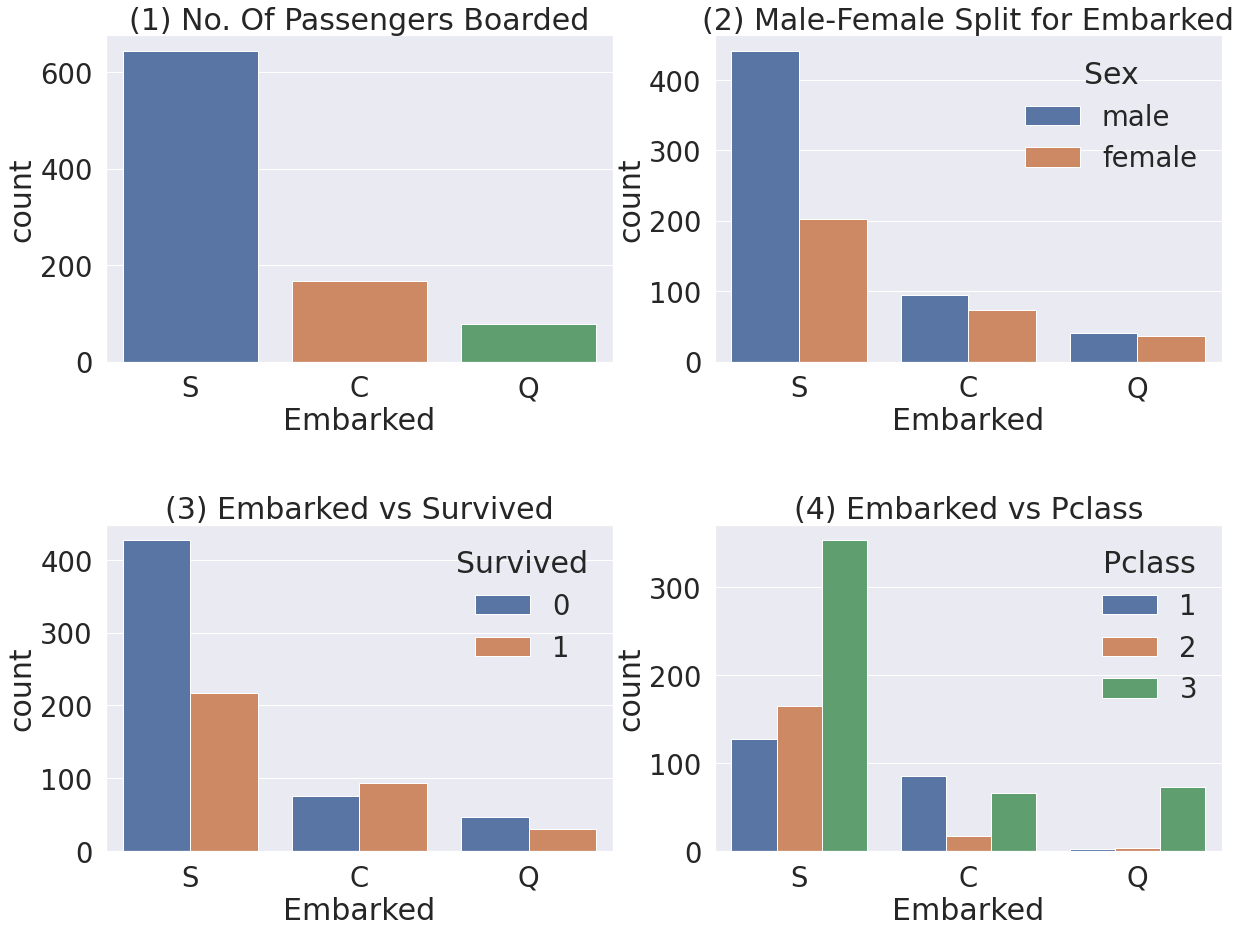

In [30]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

글쓴이는 S에서 남자가 훨씬 많고 3rd class가 많이 타서 생존률이 낮으며, C는 클래스가 높은 사람들이 많이 타서 생존률이 말하고 있습니다. 상관관계는 맞지만 인과관계를 따지기는 어려워 보입니다. 1등석 승객의 상당수가 C에서 탑승했고, 3등석 승객 대부분이 S에서 탑승했습니다. 때문에 생존률이 낮은 것이 3등석 승객이기 때문인지 S에서 탑승했기 때문인지 함부로 판단하기는 어려워 보입니다.

## 2.7 Family - SibSp + Parch

 SibSp, Parch 두 개의 feature를 합쳐 family라는 feature를 만들고 이에 대해 분석합니다.

In [31]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #자신, 형제자매, 부모자식 승객 수를 합칩니다. 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [32]:
print("Maximum of FamilySize: ", df_train['FamilySize'].max())
print("Minimum of FamilySize: ", df_train['FamilySize'].min())

Maximum of FamilySize:  11
Minimum of FamilySize:  1


생존과 FamilySize의 관계를 확인합니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


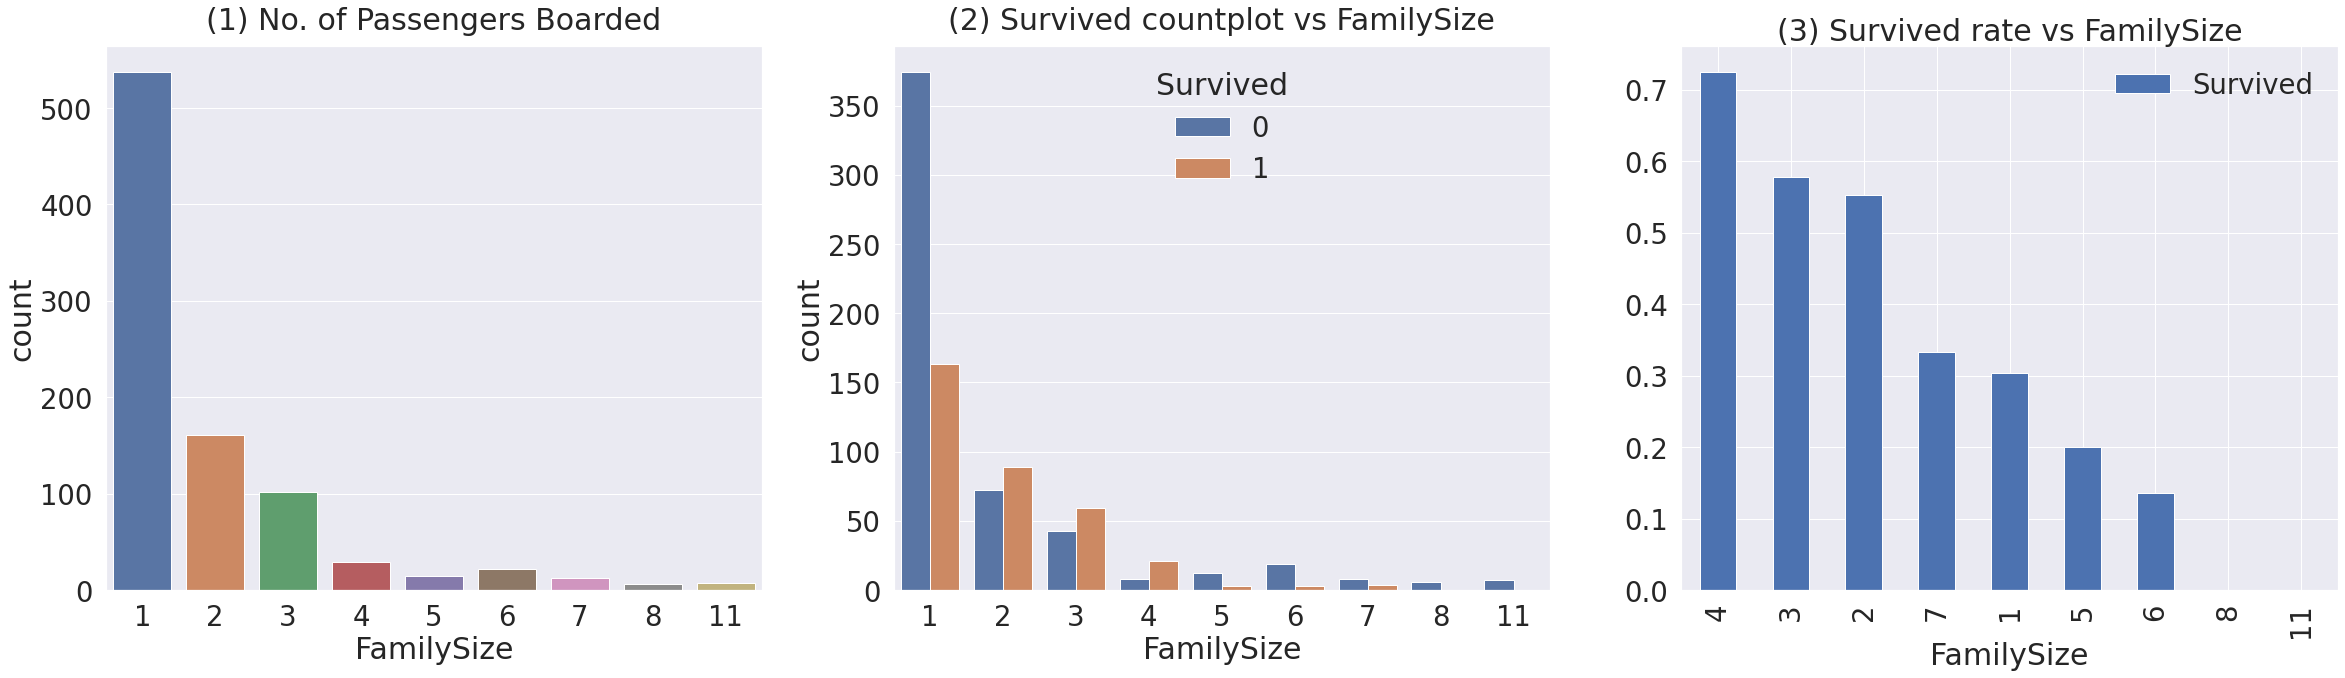

In [33]:
f, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data = df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot vs FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate vs FamilySize')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


가족과 함께 탑승한 수가 많지는 않습니다. 겹치는 경우를 생각하면 2인 가족의 수보다 4인 가족의 수가 더 과장될 가능성이 있습니다. 또 4인 가족 이상은 자료가 너무 부족합니다.
생존률은 2-4인 가족의 경우 높게 나타나고 있습니다.

## Fare
탑승요금은 실수로 주어집니다. Continuos Figure라고 합니다. 이것 역시 나이 때와 마찬가지로 histogram을 그립니다.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


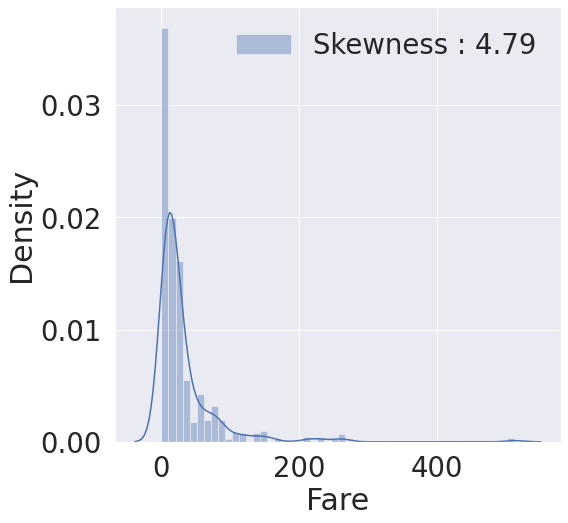

In [34]:
fix, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- skewness()는 함수가 얼마나 비대칭적인지 보여줍니다.  
이 경우 비대칭이 심해서 outlier들이 안 좋은 결과를 만들 수도 있다고 합니다. 그래서 log scale을 취하는데 lambda 함수, map, 그리고 pandas dataframe의 apply를 이용한다고 합니다.


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


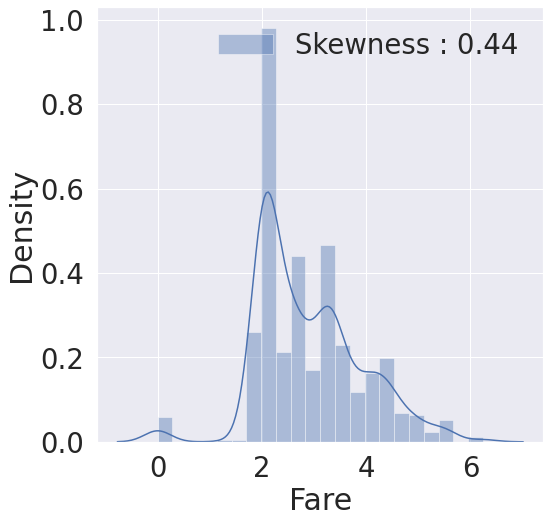

In [35]:
df_train.loc[df_train.Fare.isnull(), 'Fare'] = df_train['Fare'].mean()
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() #testset의 NaN을 평균으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

fig, ax = plt.subplots(1, 1, figsize = (8,8))
g= sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

## 2.9 cabin과 2.10 ticket
cabin은 NaN이 80%이고, ticket은 불규칙적인 string이라 일단 여기서는 다루지 않도록 한다고 합니다.

----------------



# 3. Feature Engineering

null data를 적절히 채웁니다. test도 같은 방식을 적용해서 변형해야 합니다.

## 3.1. Fill Null

##3.1.1. Fill Null in Age using Title
- 호칭을 가지고 승객의 나이를 추측해봅시다.

In [36]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')
#pandas series 에서 str.extract 메서드를 사용합니다.
#여기서 사용된 표현식은 대문자알파벳+소문자알파벳으로 시작하고,
#마침표(.)로 끝나는 문자열을 추출하라는 것입니다. 

In [37]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [38]:
df_train['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Master','Miss','Mlle','Mme','Mr','Mrs','Ms','Rev','Sir'
],
                            ['Mr','Mr','Mrs','Mr','Other','Mr','Mrs','Mr','Master','Miss','Miss','Miss','Mr','Mrs','Miss','Mr','Mr'],inplace=True)

df_test['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Miss','Mlle','Mme','Mr','Mrs','Ms','Rev','Sir'
],
                            ['Mr','Mr','Mrs','Mr','Other','Mr','Mrs','Mr','Miss','Miss','Miss','Mr','Mrs','Miss','Mr','Mr'],inplace=True)

In [39]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,456.534840,0.158192,2.384181,32.891990,0.286252,0.152542,2.639707,1.438795
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,545.857143,0.428571,1.285714,42.000000,0.571429,0.000000,3.533913,1.571429


<AxesSubplot:xlabel='Initial'>

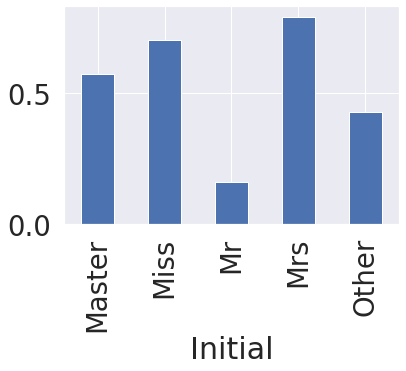

In [40]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

이제 statistics를 활용하여 Null을 채웁니다. statistics를 활용할 것인데 이 statistics는 언제나 train data의 것을 활용합니다. test data는 보지 않아야 테스트가 성립합니다.  
Initial에 따른 Age 평균을 이용해 Null value를 채웁니다. dataframe의 메서드 loc[boolean, column] 을 사용해 값을 치환하는 방법은 많이 쓴다고 합니다.

In [41]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Other'),'Age']=42

print(sum(df_train['Age'].isnull()))

0


In [42]:
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Mr'),'Age']=33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Miss'),'Age']=22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Master'),'Age']=5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Miss'),'Age']=22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Mrs'),'Age']=36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Other'),'Age']=42

print(sum(df_test['Age'].isnull()))

0


## 3.1.2 Fill Null in Embarked
S가 제일 많으니 그냥 그걸로 합니다.

In [43]:
print(sum(df_train['Embarked'].isnull()))

2


In [44]:
df_train['Embarked'].fillna('S', inplace=True) #inplace=True 이면 데이터프레임을 덮어씌웁니다.

In [45]:
print(sum(df_train['Embarked'].isnull()))

0


## Change Age (Continous to categorical)

방법을 소개하기 위해 넣었답니다. 두 가지 방법과 두 가지 방법으로 바꿔서 같은지 확인합니다.

In [46]:
#방법1. loc[]을 이용하기
df_train['Age_cat']=0
for i in range(7):
    df_train.loc[(i*10 <= df_train['Age'])&(df_train['Age']<(i+1)*10),'Age_cat']=i
    df_test.loc[(i*10 <= df_test['Age'])&(df_test['Age']<(i+1)*10),'Age_cat']=i

In [47]:
#방법2. 함수를 이용하기
df_train['Age_cat_2']=0
def category_age(x):
    for i in range(7):
        if x < 10+10*i:
            return i

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)
df_test['Age_cat_2'] = df_test['Age'].apply(category_age)

In [48]:
#test if both method return same result
print(df_train['Age_cat'].head())
print(df_train['Age_cat_2'].head())

print((df_train['Age_cat']==df_train['Age_cat_2']).all())

0    2
1    3
2    2
3    3
4    3
Name: Age_cat, dtype: int64
0    2.0
1    3.0
2    2.0
3    3.0
4    3.0
Name: Age_cat_2, dtype: float64
False


In [49]:
df_train.drop(['Age','Age_cat_2'],axis=1,inplace=True)
df_test.drop(['Age','Age_cat_2'],axis=1,inplace=True)
#Age에 대한 데이터는 Age_cat 만 남기고 지웁니다. 여기서 cat은 categorical의 줄임말로 보입니다. 

## Chane string to numerical (Initial, Embarked, Sex)
map 메소드를 이용해 string들을 integer로 바꾸어줍니다.

In [50]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other': 4})

변환 전에 값을 확인할 수도 있겠습니다.

In [51]:
df_train['Embarked'].unique()
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
df_train['Embarked']=df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked']=df_test['Embarked'].map({'C':0,'Q':1,'S':2})

df_train['Embarked'].isnull().any()

False

In [53]:
df_train['Sex']=df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex']=df_test['Sex'].map({'female':0, 'male':1})

### Heatmap plot으로 feature간의 pearson correlation 보기

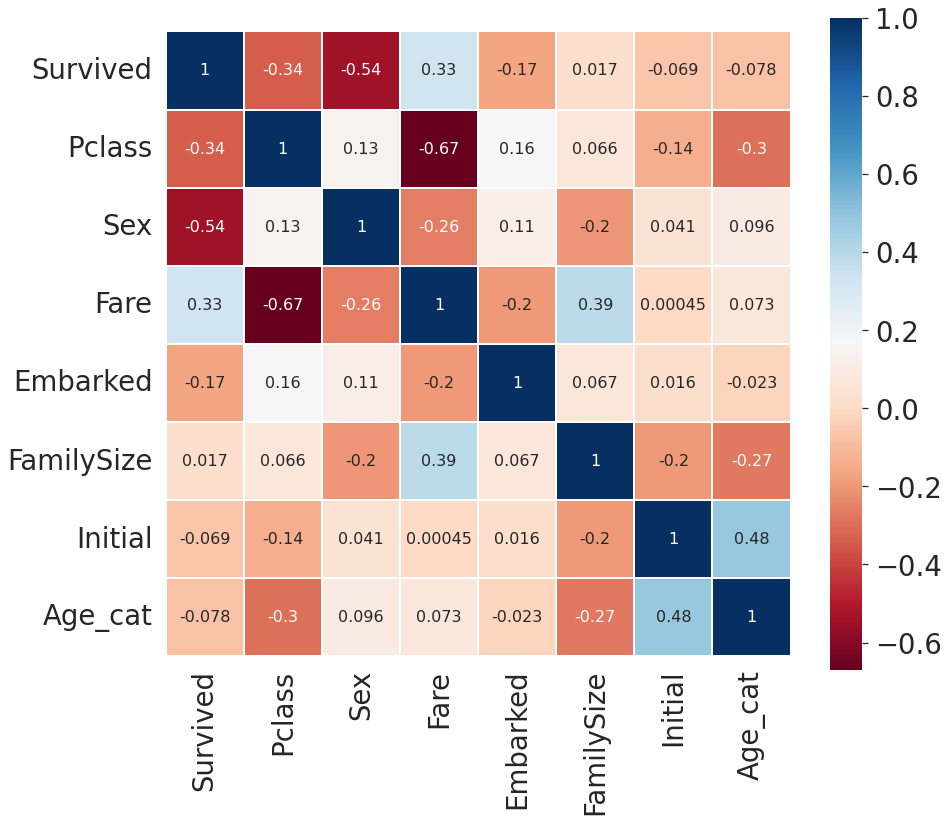

In [54]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
sns.heatmap(heatmap_data.astype(float).corr(),linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":16})

del heatmap_data

heatmap은 각 column들 사이의 상관관계를 보여줍니다. 1이나 -1, 혹은 거기에 굉장히 가까운 값이 있다면 사실상 같은 데이터가 중복되고 있다고 볼 수 있으므로 제외시켜야 합니다. 그 외에 성별과 생존율 등 우리가 상관관계가 있다고 봤던 column들이 큰 값(큰 절대값)을 보여줍니다.  
  
## Q&A)Pearson correlation?  
Let's figure out what is pearson correlation. According to the (kaggle-kr.tistory.com)[kaggle-kr.tistory.com] post I'm following, pearson correlration $r_xy$ is given as
 
 $r_{xy}=\frac{Cov(x,y)}{S_x S_y}=\frac{\frac{1}{n-1} \sum_{i=1}^n \left({x_i-\overline{x}}\right)\left({y_i - \overline{y}}\right)}{S_x S_y}$  
 
, while $S_x$ and $S_y$ are standard deviation of x and y. It is also said that $r_{xy}$ close to (1, -1) exhibits strong (positive, negative) correlation between two column(feature). I'm a little curious about characteristics of pearson correlation. Doesn't it underestimate values near average? By the way I'll not discuss about this because time's over. 
 

In [55]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
df_train.to_csv('df_train1.csv',index=False)
df_test.to_csv('df_test1.csv', index=False)
#모델에 학습시키지 않을 column을 정리합니다.
#또한 노트북이 너무 길어졌기 때문에 파일을 저장하고 다른 노트북에서 진행하도록 하겠습니다.
#이것은 /kaggle/working에 저장되었습니다.